<a href="https://colab.research.google.com/github/taylorec/Data-Structures-and-Algorithms-with-Python/blob/main/5)_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs

A graph is a set of vertices and edges that form connections between the vertices. A graph G is an ordered pair of a set V of vertices and a set E of edges given as G = (V, E) in formal mathematical notation.

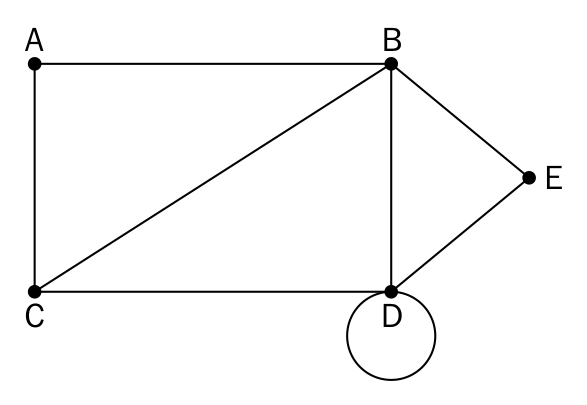




- Node or vertex: A point, usually represented by a dot in a graph. The vertices or nodes are A, B, C, D, and E.
- Edge: This is a connection between two vertices. The line connecting A and B is an example of an edge.
- Loop: When an edge from a node is incident on itself, that edge forms a loop.
Degree of a vertex: This is the number of vertices that are incident on a given vertex. The degree of vertex B is 4.
- Adjacency: This refers to the connection(s) between a node and its neighbor. The node C is adjacent to node A because there is an edge between them.
- Path: A sequence of vertices where each adjacent pair is connected by an edge.

# Breadth-first search

The breadth-first search algorithm starts at a node, chooses that node or vertex as its root node, and visits the neighboring nodes, after which it explores neighbors on the next level of the graph.

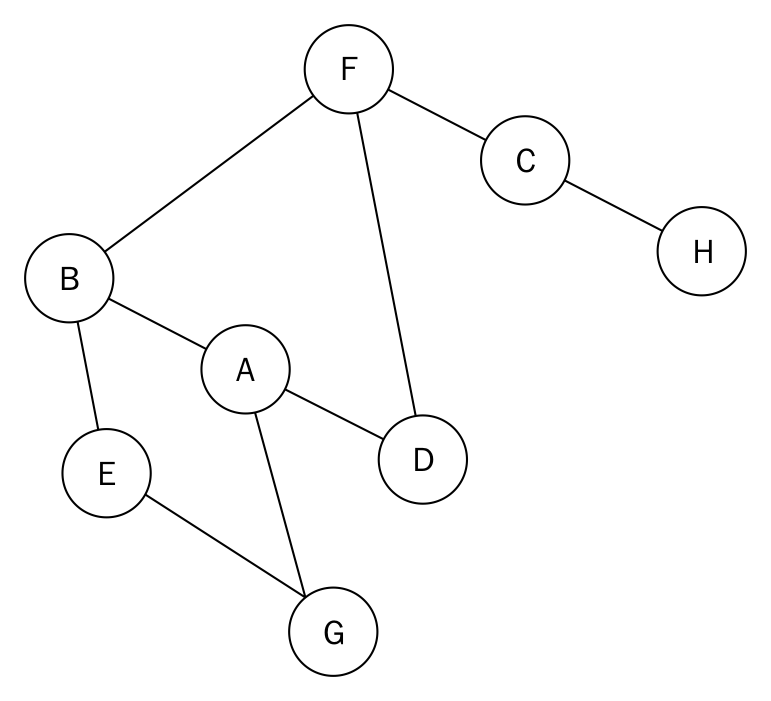

In [ ]:
    graph = dict()
    graph['A'] = ['B', 'G', 'D']
    graph['B'] = ['A', 'F', 'E']
    graph['C'] = ['F', 'H']
    graph['D'] = ['F', 'A']
    graph['E'] = ['B', 'G']
    graph['F'] = ['B', 'D', 'C']
    graph['G'] = ['A', 'E']
    graph['H'] = ['C']

In [ ]:
    from collections import deque

    def breadth_first_search(graph, root):
        visited_vertices = list()
        graph_queue = deque([root])
        visited_vertices.append(root)
        node = root

        while len(graph_queue) > 0:
            node = graph_queue.popleft()
            adj_nodes = graph[node]

            remaining_elements =
                set(adj_nodes).difference(set(visited_vertices))
            if len(remaining_elements) > 0:
                for elem in sorted(remaining_elements):
                    visited_vertices.append(elem)
                    graph_queue.append(elem)

        return visited_vertices

### Depth-first Search Algorithm

Depth-first search algorithm traverses the depth of any particular path in the graph before traversing its breadth. As such, child nodes are visited first before sibling nodes.

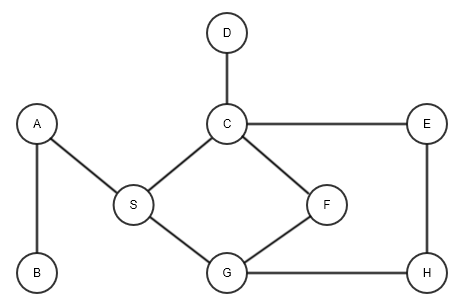

In [ ]:
# adjacency list of the given graph
graph = dict()
graph['A'] = ['B', 'S']
graph['B'] = ['A']
graph['S'] = ['A','G','C']
graph['D'] = ['C']
graph['G'] = ['S','F','H']
graph['H'] = ['G','E']
graph['E'] = ['C','H']
graph['F'] = ['C','G']
graph['C'] = ['D','S','E','F']

In [ ]:
# The graph_stack stack variable is used to aid the traversal process
# The starting node, called root, is passed with the graph's adjacency matrix
# root is pushed onto the stack
# node = root holds the first node in the stack
def depth_first_search(graph, root):
        visited_vertices = list()
        graph_stack = list()
        graph_stack.append(root)
        node = root
        while len(graph_stack) > 0:
            if node not in visited_vertices:
                visited_vertices.append(node)
            adj_nodes = graph[node]
            if set(adj_nodes).issubset(set(visited_vertices)):
                graph_stack.pop()
                if len(graph_stack) > 0:
	                node = graph_stack[-1]
                continue
            else:
                remaining_elements = set(adj_nodes).difference(set(visited_vertices))
            first_adj_node = sorted(remaining_elements)[0]
            graph_stack.append(first_adj_node)
            node = first_adj_node
        return visited_vertices



print(depth_first_search(graph, 'A'))

['A', 'B', 'S', 'C', 'D', 'E', 'H', 'G', 'F']


After visiting the A vertex, we visit one of its neighbors, B.
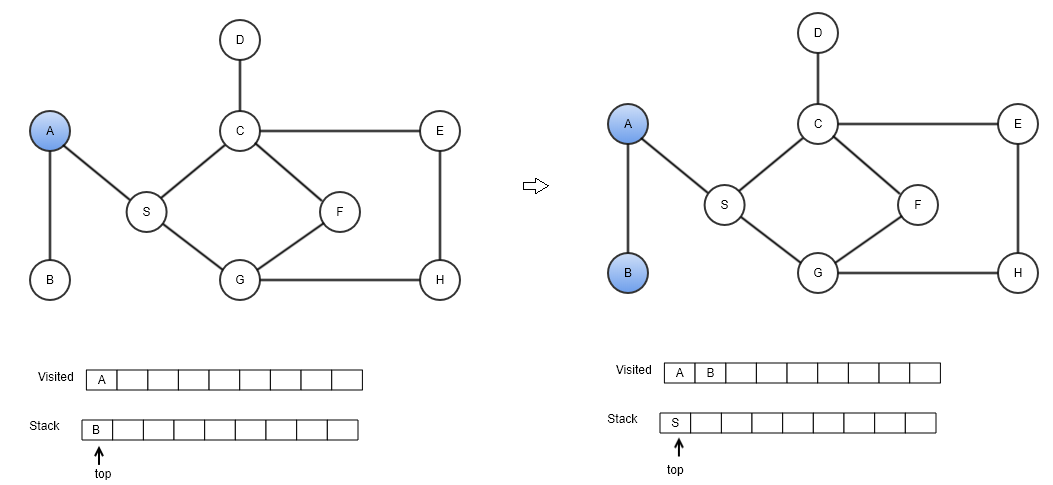

After visiting the B vertex, we look at another neighbor of A, that is, S.
Next, we look for the neighbors of the S vertex, vertices C and later G.
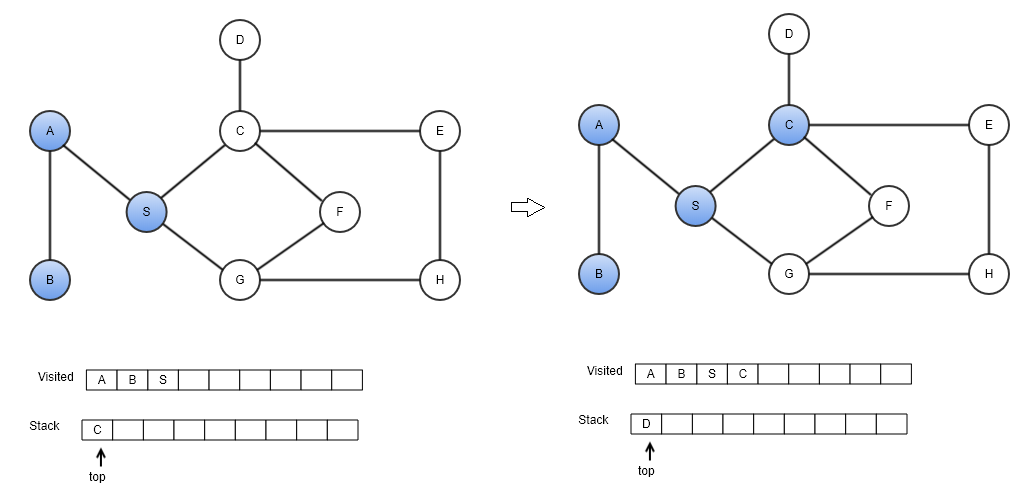

After visiting the C node, we visit its neighboring vertices, D and E.
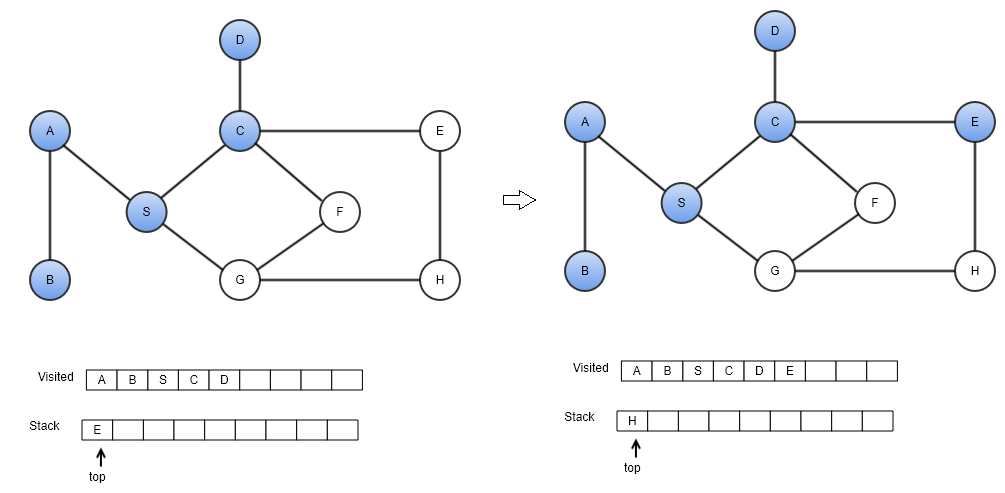

After visiting the E vertex, we visit the H, G and F vertices.
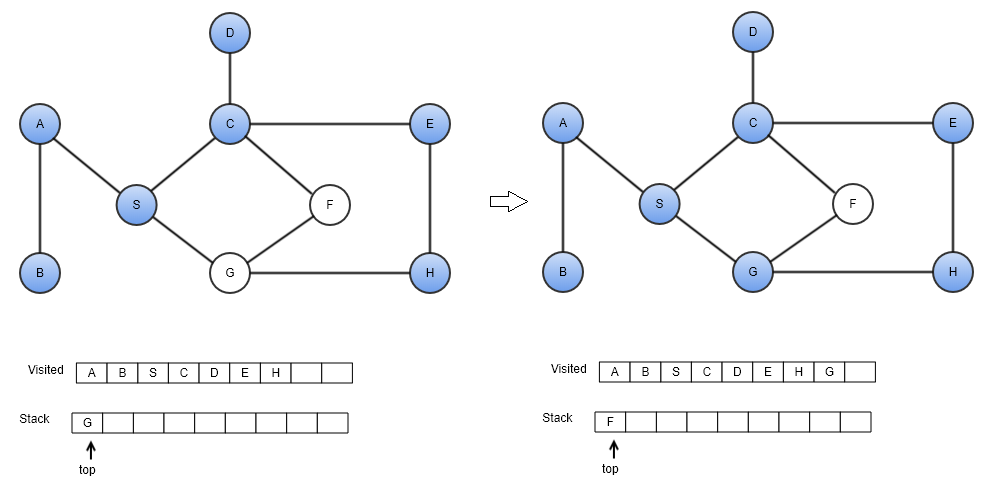

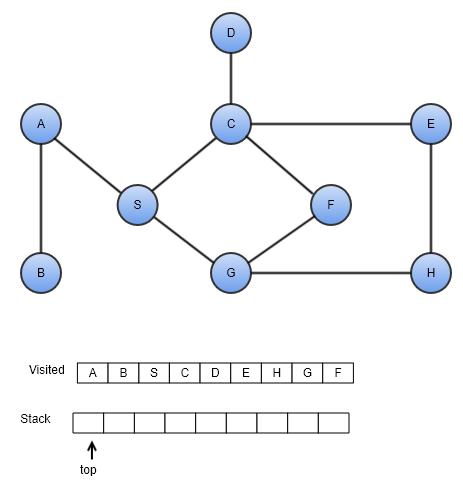

#### Shortest Path Problem - Dijkstra's Alogithm





The shortest path problem requires us to find out the shortest possible route between nodes in a graph. Dijkstra's algorithm is used to find the shortest distance from a source to all other nodes or vertices in a graph.
The algorithm works as follows:
1. Initially, mark all the nodes as unvisited, and set their distance from the given source node to infinity (the source node is set to zero).

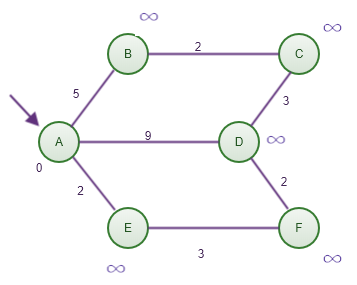

2. Set the source node as current.

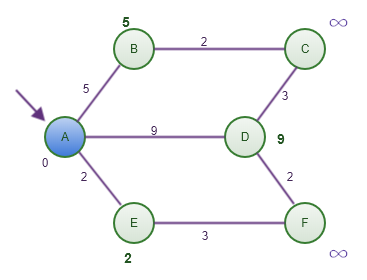

3. For the current node, look for all the unvisited adjacent nodes; compute the distance to that node from the source node through the current node. Compare the newly computed distance to the currently assigned distance, and if it is smaller, set this as the new value.

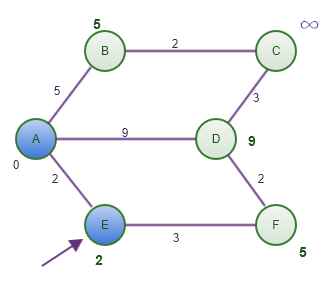

4. Once we have considered all the unvisited adjacent nodes of the current node, we mark it as visited.

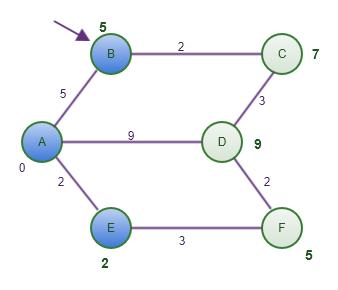

5. We next consider the next unvisited node which has the shortest distance from the source node. Repeat steps 2 to 4.

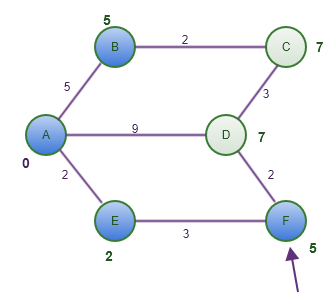

6. We stop when the list of unvisited nodes is empty, meaning we have considered all the unvisited nodes.

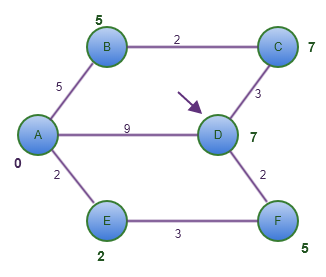

In [ ]:
def get_shortest_distance(table, vertex):
        shortest_distance = table[vertex][DISTANCE]
        return shortest_distance

def set_shortest_distance(table, vertex, new_distance):
        table[vertex][DISTANCE] = new_distance

def set_previous_node(table, vertex, previous_node):
        table[vertex][PREVIOUS_NODE] = previous_node

def get_distance(graph, first_vertex, second_vertex):
        return graph[first_vertex][second_vertex]

def get_next_node(table, visited_nodes):
        unvisited_nodes = list(set(table.keys()).difference(set(visited_nodes)))
        assumed_min = table[unvisited_nodes[0]][DISTANCE]
        min_vertex = unvisited_nodes[0]
        for node in unvisited_nodes:
            if table[node][DISTANCE] < assumed_min:
                assumed_min = table[node][DISTANCE]
                min_vertex = node
        return min_vertex

def find_shortest_path(graph, table, origin):
   visited_nodes = []
   current_node = origin
   starting_node = origin
   while True:
        adjacent_nodes = graph[current_node]
        if set(adjacent_nodes).issubset(set(visited_nodes)):
            # Nothing here to do. All adjacent nodes have been visited.
            pass
        else:
            unvisited_nodes = set(adjacent_nodes).difference(set(visited_nodes))
            for vertex in unvisited_nodes:
                distance_from_starting_node = get_shortest_distance(table, vertex)
                if distance_from_starting_node == INFINITY and current_node == starting_node:
                    total_distance = get_distance(graph, vertex, current_node)
                else:
                    total_distance = get_shortest_distance (table,
                    current_node) + get_distance(graph, current_node, vertex)
                if total_distance < distance_from_starting_node:
                    set_shortest_distance(table, vertex, total_distance)
                    set_previous_node(table, vertex, current_node)
        visited_nodes.append(current_node)
        #print(visited_nodes)
        if len(visited_nodes) == len(table.keys()):
            break
        current_node = get_next_node(table,visited_nodes)
   return(table)

graph = dict()
graph['A'] = {'B': 5, 'D': 9, 'E': 2}
graph['B'] = {'A': 5, 'C': 2}
graph['C'] = {'B': 2, 'D': 3}
graph['D'] = {'A': 9, 'F': 2, 'C': 3}
graph['E'] = {'A': 2, 'F': 3}
graph['F'] = {'E': 3, 'D': 2}

table = dict()
table = {
        'A': [0, None],
        'B': [float("inf"), None],
        'C': [float("inf"), None],
        'D': [float("inf"), None],
        'E': [float("inf"), None],
        'F': [float("inf"), None],
}


DISTANCE = 0
PREVIOUS_NODE = 1
INFINITY = float('inf')

shortest_distance_table = find_shortest_path(graph, table, 'A')


for k in sorted(shortest_distance_table):
        print("{} - {}".format(k,shortest_distance_table[k]))

A - [0, None]
B - [5, 'A']
C - [7, 'B']
D - [7, 'F']
E - [2, 'A']
F - [5, 'E']
